In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, '/cluster/work/climate/dnikolo/n2o')
from Glaciation_time_estimator.Auxiliary_func.config_reader import read_config

In [4]:
config = read_config(
    '/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimator/config_half.yaml')
output_dir = os.path.join(
    config['postprocessing_output_dir'], "np",
    config['time_folder_name'],
    f"Agg_{config['agg_fact']:02}_Glaciations"
)
# Save DataFrame to Parquet
output_dir_parq = output_dir + ".parquet"
glaciations_df = pd.read_parquet(output_dir_parq)


Add extra variables

In [5]:
glaciations_df["Glaciation rate"] = glaciations_df["Magnitude"] / glaciations_df["Glaciation time [h]"]

# Assigning size bins with custom labels
glaciations_df["Size bin"] = pd.cut(
    glaciations_df["avg_size[km]"],
    bins=[1000, 2000, 5000, 10000, np.inf],
    labels=["Small", "Medium", "Large", "Very Large"]
)

# Assigning lifetime bins with custom labels
glaciations_df["Lifetime bin"] = pd.cut(
    glaciations_df["Lifetime [h]"],
    bins=[0, 1, 2, 5, np.inf],
    labels=["Very Short", "Short", "Medium", "Long"])

glaciations_df["Magnitude bin"] =pd.cut(
    glaciations_df["Magnitude"],
    bins=[0.4, 0.6, 0.8, 1],
    labels=["Small", "Medium", "Full"])
glaciating_clouds = glaciations_df.drop_duplicates(subset="Cloud_ID",keep="first")


In [6]:
# Velry large long lived clouds
vlll_glaciations = glaciations_df[(glaciations_df["Lifetime bin"]=="Long") & (glaciations_df["Size bin"]=="Very Large")]
vlll_clouds = glaciating_clouds[(glaciating_clouds["Lifetime bin"]=="Long") & (glaciating_clouds["Size bin"]=="Very Large")]
linear_glac=glaciations_df[(glaciations_df["Linear"]==True) ]

<Axes: xlabel='Glaciation rate', ylabel='Count'>

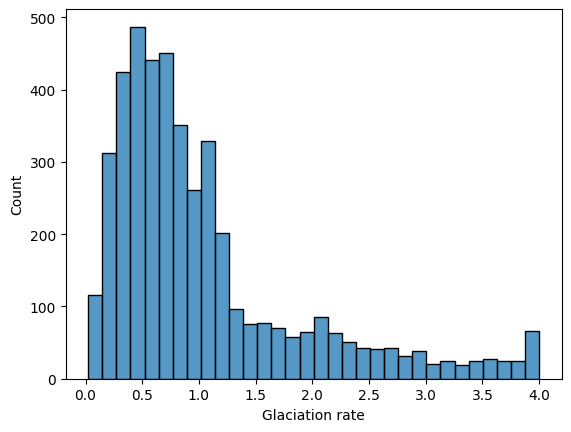

In [7]:
sns.histplot(data = linear_glac, x="Glaciation rate", binwidth=0.125)

<Axes: xlabel='Glaciation rate', ylabel='Count'>

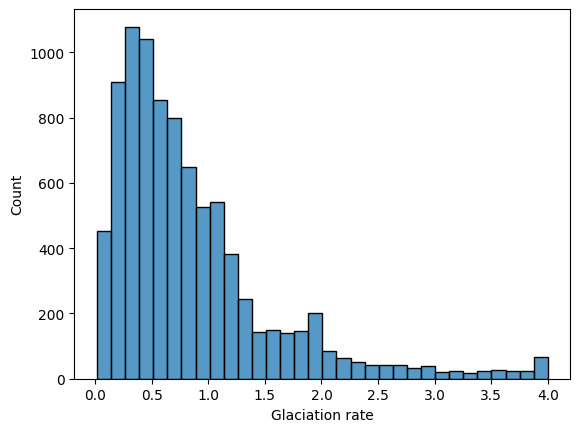

In [8]:
sns.histplot(data = glaciations_df, x="Glaciation rate", binwidth=0.125)

In [9]:
glaciations_df["Mean_glac_rate"]

0       0.413273
1       0.555538
2       0.441792
3       0.651806
4       0.508115
          ...   
8889    0.783962
8890    1.232169
8891    0.409871
8892    1.853996
8893    0.917972
Name: Mean_glac_rate, Length: 8894, dtype: float64

(0.0, 4.0)

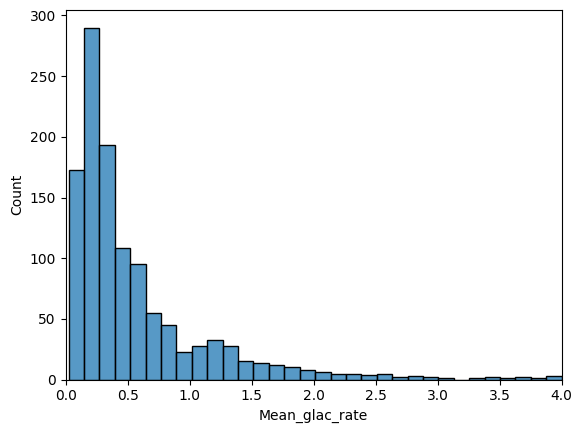

In [15]:
sns.histplot(data = vlll_glaciations, x="Mean_glac_rate", binwidth=0.125)
plt.xlim(0,4)

In [11]:
# Pivot table to calculate the count of samples
linear_glac.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc="count")

/cluster/work/climate/dnikolo/dump/ipykernel_2713075/1338891699.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  linear_glac.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc="count")


Size bin,Small,Medium,Large,Very Large
Lifetime bin,,,,
Very Short,365,718,90,20
Short,173,867,251,55
Medium,34,557,433,196
Long,1,79,179,427


/cluster/work/climate/dnikolo/dump/ipykernel_2713075/1107455543.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  glue = linear_glac.pivot_table(index="Lifetime bin", columns="Size bin", values="Mean_glac_rate", aggfunc = "mean")


Text(0.5, 1.0, 'Mean glaciation rate[ΔIF/h]\nin different cloud types')

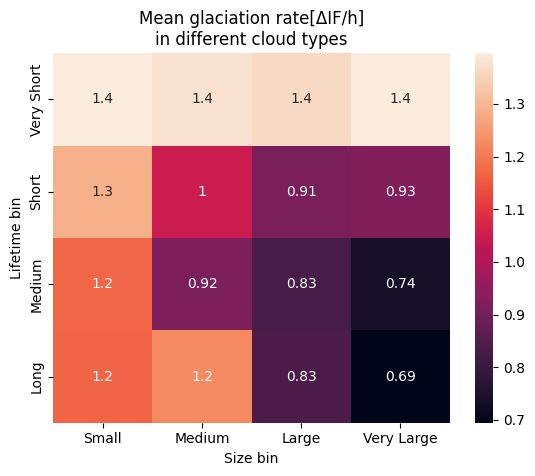

In [12]:
glue = linear_glac.pivot_table(index="Lifetime bin", columns="Size bin", values="Mean_glac_rate", aggfunc = "mean")
sns.heatmap(glue, annot=True)
plt.title("Mean glaciation rate[ΔIF/h]\nin different cloud types")

In [13]:
glac_rate_bin_bounds=np.linspace(0,4.01,0.25)
for i in glaciations_df.iterrows()

SyntaxError: expected ':' (3180893458.py, line 2)

In [ ]:
linear_glac.shape

(4445, 41)

<Axes: xlabel='Glaciation rate', ylabel='Probability'>

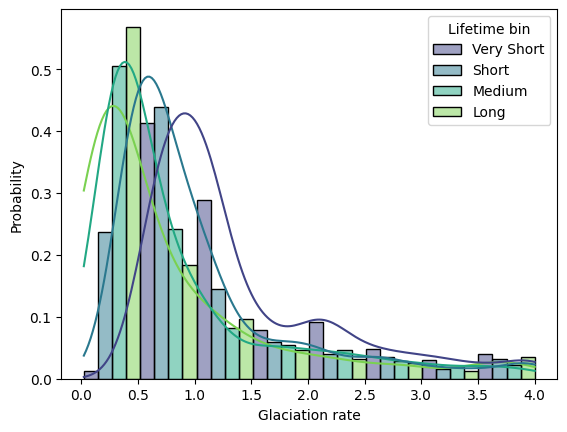

In [ ]:
sns.histplot(data = linear_glac, x= "Glaciation rate",hue="Lifetime bin", multiple="dodge",common_norm=False, stat="probability", binwidth=0.5,kde=True, palette="viridis")

<Axes: xlabel='Glaciation rate', ylabel='Probability'>

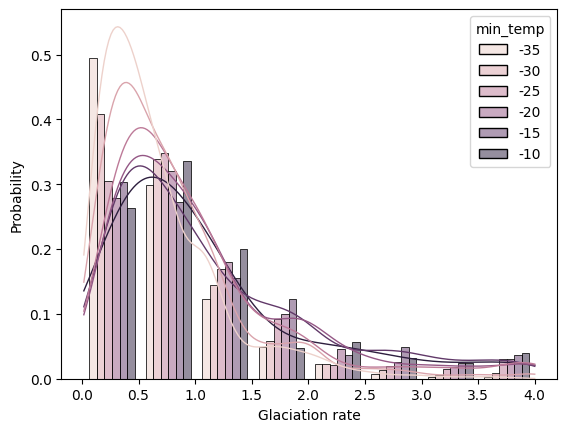

In [ ]:
sns.histplot(data = glaciations_df, x= "Glaciation rate",hue="min_temp", multiple="dodge",common_norm=False, stat="probability", binwidth=0.5,kde=True,shrink=0.8,line_kws={"linewidth":1})
# sns.histplot(data = glaciations_df, x= "Glaciation rate",hue="min_temp", multiple="dodge",common_norm=False, binwidth=0.5,kde=True)

<Axes: xlabel='Glaciation rate', ylabel='Probability'>

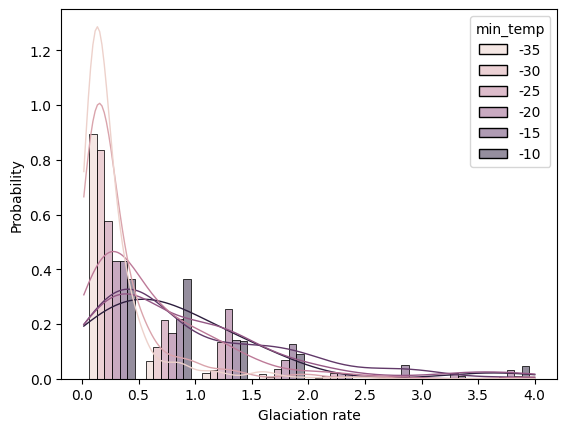

In [ ]:
sns.histplot(data = vlll_glaciations, x= "Glaciation rate",hue="min_temp", multiple="dodge",common_norm=False, stat="probability", binwidth=0.5,kde=True,shrink=0.8,line_kws={"linewidth":1})
# sns.histplot(data = glaciations_df, x= "Glaciation rate",hue="min_temp", multiple="dodge",common_norm=False, binwidth=0.5,kde=True)

/cluster/work/climate/dnikolo/dump/ipykernel_2578179/915407457.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sample_count = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc="count")


Text(0.5, 1.0, 'Number of clouds in each category')

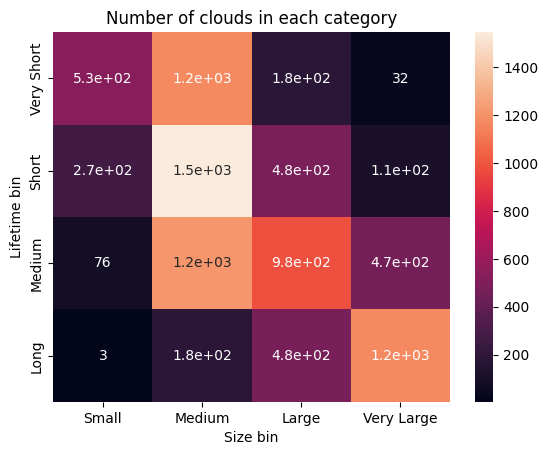

In [ ]:
# Pivot table to calculate the count of samples
sample_count = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc="count")
sns.heatmap(sample_count, annot=True)
plt.title("Number of clouds in each category")

/cluster/work/climate/dnikolo/dump/ipykernel_2578179/2061864414.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation rate", aggfunc = "mean")


Text(0.5, 1.0, 'Mean glaciation rate[ΔIF/h]\nin different cloud types')

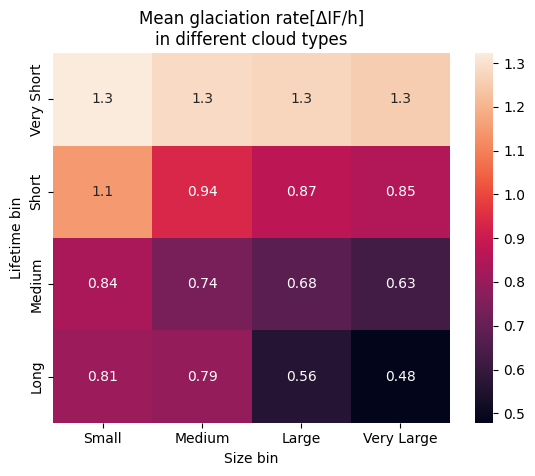

In [ ]:
glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation rate", aggfunc = "mean")
sns.heatmap(glue, annot=True)
plt.title("Mean glaciation rate[ΔIF/h]\nin different cloud types")

/cluster/work/climate/dnikolo/dump/ipykernel_2713075/3609897132.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc = "median")


Text(0.5, 1.0, 'Mean galciation time [h]\nin different cloud types')

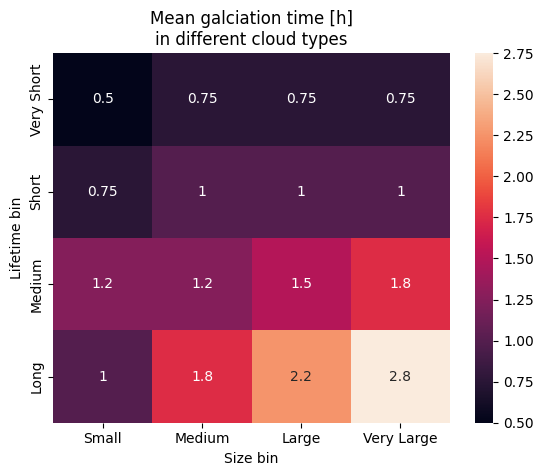

In [33]:
glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc = "median")
sns.heatmap(glue, annot=True)
plt.title("Mean galciation time [h]\nin different cloud types")

/cluster/work/climate/dnikolo/dump/ipykernel_2713075/2981924545.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  glue = glaciations_df.pivot_table(index="Magnitude bin", columns="Lifetime bin", values="Glaciation time [h]", aggfunc = "median")


<Axes: xlabel='Lifetime bin', ylabel='Magnitude bin'>

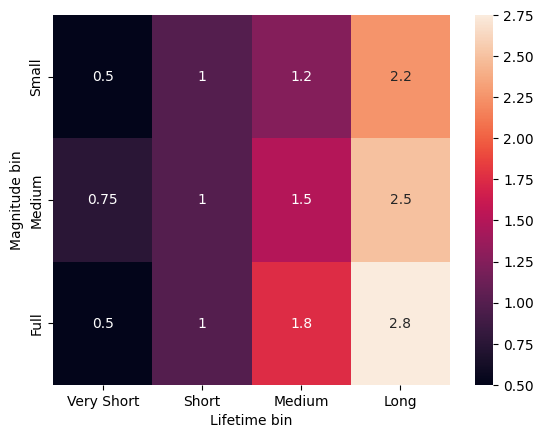

In [32]:
glue = glaciations_df.pivot_table(index="Magnitude bin", columns="Lifetime bin", values="Glaciation time [h]", aggfunc = "median")
# glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="Glaciation time [h]", aggfunc = "mean")
sns.heatmap(glue, annot=True)

In [26]:
glaciations_df.keys()

Index(['Cloud_ID', 'Time [m]', 'Magnitude', 'Glac_start_ind', 'Glac_peak_ind',
       'Linear', 'line_rmse', 'Rate_arr', 'Mean_glac_rate',
       'Glaciation time [h]', 'is_liq', 'is_mix', 'is_ice', 'max_water_frac',
       'max_ice_fraction', 'avg_size[km]', 'max_size[km]', 'min_size[km]',
       'avg_size[px]', 'max_size[px]', 'min_size[px]', 'track_start_time',
       'track_length', 'glaciation_start_time', 'glaciation_end_time',
       'avg_lat', 'avg_lon', 'start_ice_fraction', 'end_ice_fraction',
       'ice_frac_hist', 'lat_hist', 'lon_hist', 'size_hist_km', 'min_temp',
       'max_temp', 'pole', 'Hemisphere', 'Lifetime [h]', 'Glaciation rate',
       'Size bin', 'Lifetime bin', 'Magnitude bin'],
      dtype='object')

In [27]:
glaciations_df["Glaciation time [h]"].corr(glaciations_df["Magnitude"])

0.07593956991543163

/cluster/work/climate/dnikolo/dump/ipykernel_2713075/4046771368.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="avg_size[km]", aggfunc = "mean")


Text(0.5, 1.0, 'Mean area [km^2]\nin different cloud types')

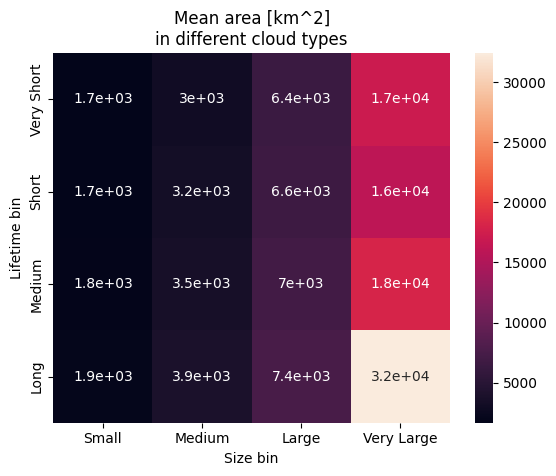

In [17]:
glue = glaciations_df.pivot_table(index="Lifetime bin", columns="Size bin", values="avg_size[km]", aggfunc = "mean")
sns.heatmap(glue, annot=True)
plt.title("Mean area [km^2]\nin different cloud types")

<Axes: xlabel='Lifetime [h]', ylabel='avg_size[km]'>

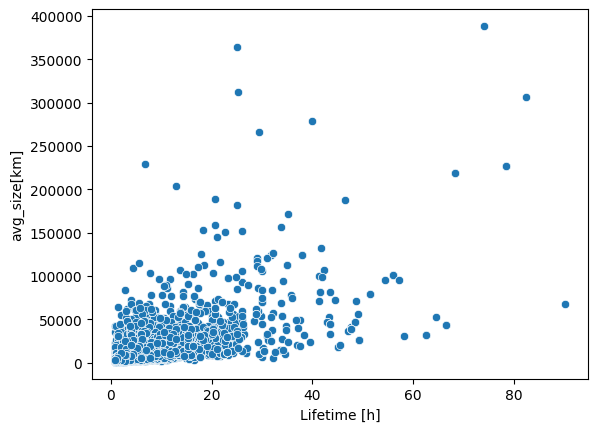

In [ ]:
sns.scatterplot(data=glaciations_df, x="Lifetime [h]", y= "avg_size[km]")

In [ ]:
def normalize_IF_hist(row):
    lst = row['ice_frac_hist']
    normalized_length = 100
    original_indices = np.linspace(0, 1, len(lst))
    target_indices = np.linspace(0, 1, normalized_length)
    return np.interp(target_indices, original_indices, lst)

In [ ]:
for i, row in glaciations_df.iterrows():
    normalize_IF_hist(row)

In [ ]:
glaciations_df["Cloud_ID"].value_counts()

Cloud_ID
224487    3
224802    3
224589    3
122812    3
91637     3
         ..
155510    1
155524    1
155526    1
155545    1
155467    1
Name: count, Length: 8694, dtype: int64

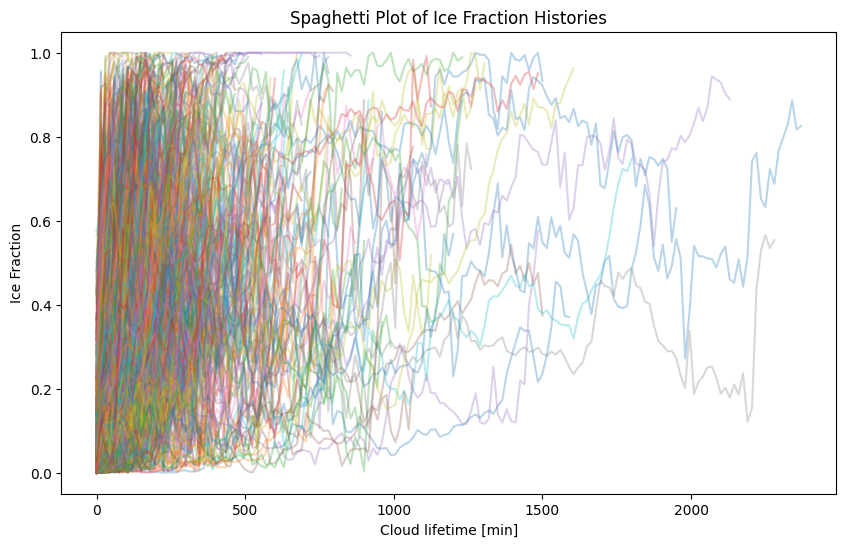

In [ ]:
import matplotlib.pyplot as plt

sample_df = glaciations_df.sample(100, random_state=0)
# sample_df = sample_df[sample_df[""]]

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Loop through each row and plot the lists in 'ice_frac_hist'
for i, row in vlll_clouds.iterrows():
    # ice_frac_hist = ice_frac_hist = row['ice_frac_hist'][row["Glac_start_ind"]:row["Glac_peak_ind"]] # - row['ice_frac_hist'][]
    # print(, )
    ice_frac_hist = row['ice_frac_hist'][row["Glac_start_ind"]:row["Glac_peak_ind"]] # - row['ice_frac_hist'][row["Glac_start_ind"]]
    plt.plot(np.arange(len(ice_frac_hist))*15, ice_frac_hist, alpha=0.3)  # Add alpha for transparency to better visualize overlaps

# Add labels and title
plt.xlabel('Cloud lifetime [min]')
plt.ylabel('Ice Fraction')
plt.title('Spaghetti Plot of Ice Fraction Histories')
# plt.xlim(0,150)
# Show the plot
plt.show()

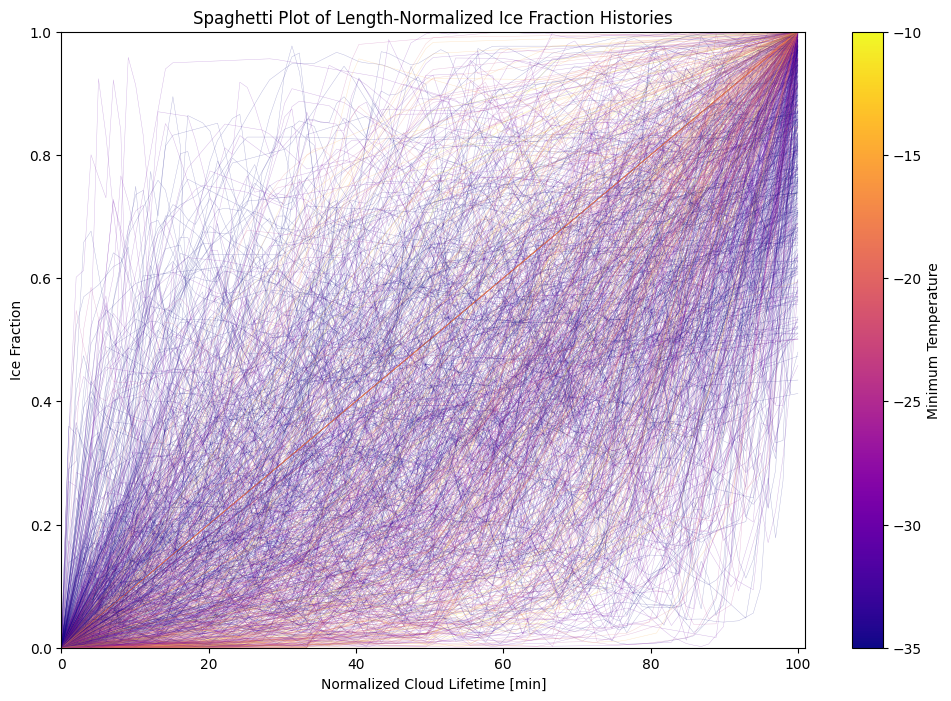

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `vlll_clouds` is a DataFrame with the required data
# Example columns: 'ice_frac_hist', 'Glac_start_ind', 'Glac_peak_ind', 'min_temp'

# Normalize the length of each path
def normalize_length(series, target_length=100):
    """
    Normalize the length of a list to the specified target length.
    """
    return np.interp(
        np.linspace(0, len(series) - 1, target_length),
        np.arange(len(series)),
        series
    ) - series[0]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a colormap for `min_temp`
norm = plt.Normalize(vlll_clouds['min_temp'].min(), vlll_clouds['min_temp'].max())
cmap = plt.cm.plasma

# Plot each normalized path with color based on `min_temp`
for i, row in vlll_clouds.sample(1000, random_state=0).iterrows():
    ice_frac_hist = np.array(row['ice_frac_hist'][row["Glac_start_ind"]:row["Glac_peak_ind"]+1])*1/row['ice_frac_hist'][row["Glac_peak_ind"]]
    norm_ice_frac_hist = normalize_length(ice_frac_hist)
    color = cmap(norm(row['min_temp']))
    ax.plot(np.linspace(0, 100, len(norm_ice_frac_hist)), norm_ice_frac_hist, color=color, alpha=0.3, linewidth = 0.3)

# Add labels and title
ax.set_xlabel('Normalized Cloud Lifetime [min]')
ax.set_ylabel('Ice Fraction')
ax.set_title('Spaghetti Plot of Length-Normalized Ice Fraction Histories')
plt.xlim(0,101)
plt.ylim(0,1)
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a ScalarMappable for colorbar
sm.set_array([])  # Set a dummy array to make ScalarMappable work
cbar = fig.colorbar(sm, ax=ax, label="Minimum Temperature")

# Show the phttps://jupyter.euler.hpc.ethz.ch/066028d3-2354-42a2-ac9c-835febc8a014lot
plt.show()


<Axes: xlabel='min_temp', ylabel='Count'>

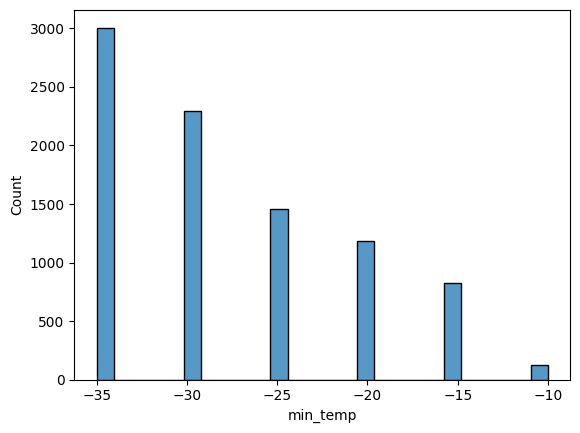

In [ ]:
sns.histplot(data=glaciations_df, x="min_temp")

In [ ]:
glaciations_df.keys()

Index(['Cloud_ID', 'Time [m]', 'Magnitude', 'Glac_start_ind', 'Glac_peak_ind',
       'Linear', 'line_rmse', 'Rate_arr', 'Mean_glac_rate',
       'Glaciation time [h]', 'is_liq', 'is_mix', 'is_ice', 'max_water_frac',
       'max_ice_fraction', 'avg_size[km]', 'max_size[km]', 'min_size[km]',
       'avg_size[px]', 'max_size[px]', 'min_size[px]', 'track_start_time',
       'track_length', 'glaciation_start_time', 'glaciation_end_time',
       'avg_lat', 'avg_lon', 'start_ice_fraction', 'end_ice_fraction',
       'ice_frac_hist', 'lat_hist', 'lon_hist', 'size_hist_km', 'min_temp',
       'max_temp', 'pole', 'Hemisphere', 'Lifetime [h]', 'Glaciation rate',
       'Size bin', 'Lifetime bin'],
      dtype='object')

In [ ]:
import seaborn as sns

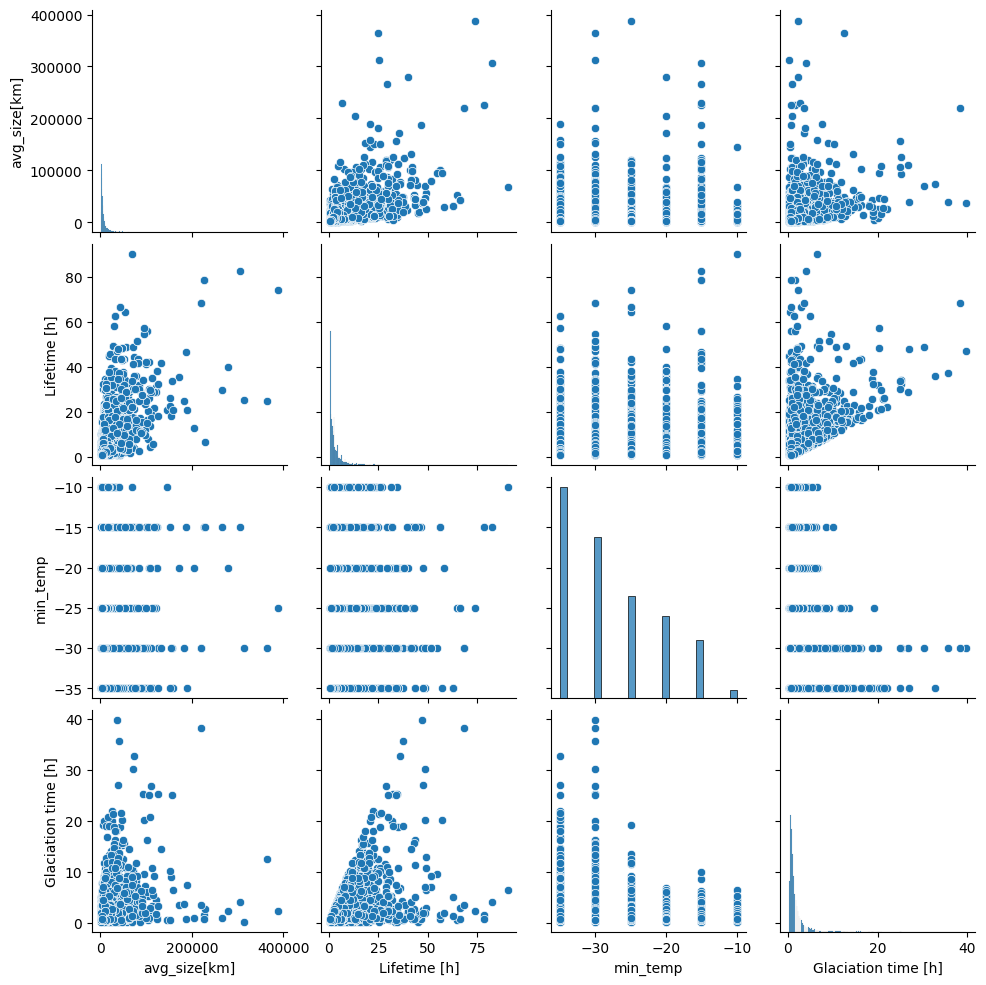

In [ ]:
clean_df = glaciations_df[["avg_size[km]", "Lifetime [h]", "min_temp","Glaciation time [h]"]]
sns.pairplot(data=clean_df)